333 413
256 256


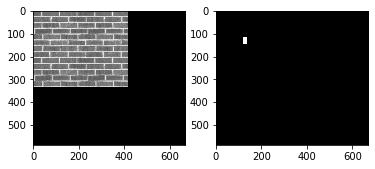

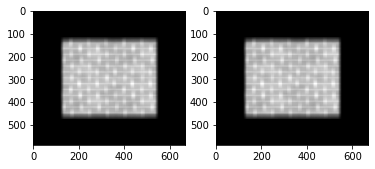

In [20]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
from scipy import signal 
import time 

def conv(im,filt):
    orig_h,orig_w = im.shape
    filt_size = filt.shape[0]
#     if filt_size%2 == 1:
#         pad = filt_size//2
#         pad_im = np.pad(im,(pad,pad),mode='constant')
#     else:
#         filt = np.pad(filt,(1,0),mode='constant')
        
    kernel = np.flipud(np.fliplr(filt))
    start_h = filt_size//2
    start_w = filt_size//2
    
    new_h = (orig_h - filt_size + 2*(filt_size//2)) + 1
    new_w = (orig_w - filt_size + 2*(filt_size//2)) + 1
    output = np.zeros((new_h,new_w),dtype='complex128')
    i1=0
    for i in range(start_h,new_h - start_h):
        i2 = 0
        for j in range(start_w,new_w - start_w):
#             cur = im[(i-start_h):(i+start_h+1),(j-start_w):(j+start_w+1)]
            cur = im[(i-start_h):(i+start_h),(j-start_w):(j+start_w)]
#             print(cur.shape)
#             print(kernel.shape)
            output[i1,i2] = np.sum(np.multiply(cur,kernel))
            i2=i2+1
        i1+=1    
    return output

f = cv2.imread('../input/bricks.jpg',0).astype('float64')
h = cv2.imread('../input/rectangle.jpg',0).astype('float64')
f_h,f_w = f.shape
h_h,h_w = h.shape
print(f_h,f_w)
print(h_h,h_w)

# max_dim = np.amax([f_h,f_w,h_h,h_w])
# pos = np.ceil(np.log2(max_dim))
# p = int(2**pos)

padded_f = np.zeros((f_h+h_h-1,f_w+h_w-1))
padded_h = np.zeros((f_h+h_h-1,f_w+h_w-1))
padded_f[0:f_h,0:f_w] = f
padded_h[0:h_h,0:h_w] = h

plt.figure()
plt.subplot(121)
plt.imshow(padded_f,'gray')
plt.subplot(122)
plt.imshow(padded_h,'gray')
plt.show()

# mult = np.zeros(())
mult = np.multiply(np.fft.fft2(padded_h),np.fft.fft2(padded_f))
im_new = abs((np.fft.ifft2(mult)))

im_in = signal.convolve(f,h,mode='full')

# im_in = conv(f,h).astype('float64')
plt.figure()
plt.subplot(121)
plt.imshow(im_new,'gray')
plt.subplot(122)
plt.imshow(im_in,'gray')
plt.show()


In [22]:
start_time2 = time.time()
mult = np.multiply(np.fft.fft2(padded_h),np.fft.fft2(padded_f))
im_new = np.fft.ifft2(mult)
end_time2 = time.time()
time2 = end_time2 - start_time2

start_time1 = time.time()
im_in = signal.convolve2d(f,h,mode='full')
end_time1 = time.time()
time1 = end_time1 - start_time1

print('time for conv2:',time1)
print('time for dft:',time2)
print('Average error : ',np.sum(abs(im_in - im_new))/(im_in.shape[0]*im_in.shape[1]))

time for conv2: 65.73619294166565
time for dft: 0.4414241313934326
Average error :  3.8502816403167195e-09


For bigger f and h , convolution(O(n^2)) will take lesser time for computation whereas fft(O(nlogn)) will take more time.

For smaller f and h , convolution will take more time for computation whereas fft will take lesser time. 